In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [2]:
df_train = pd.read_csv('hw3_train.csv', encoding='utf8')

In [3]:
df_train.T;

In [4]:
#df_train.info()

In [5]:
df_train.shape

(7500, 29)

In [6]:
import seaborn as sns
plt.style.use('ggplot')                       # задаем единоразово стиль графиков 
plt.rcParams['figure.figsize'] = (18,12)
#sns.heatmap(df_train.corr('kendall'), annot=True, linewidths=.5);

In [7]:
#for col in df_train.columns: print(col, df_train[col].unique())

In [8]:
df_test = pd.read_csv('hw3_test_data.csv', encoding='utf8')

In [9]:
df_train.shape

(7500, 29)

In [10]:
df_train.groupby('is_new_customer')['is_new_customer'].count()

is_new_customer
-1.0      58
 0.0    7440
 1.0       2
Name: is_new_customer, dtype: int64

In [11]:
def preprocess_data(df_input):
    df_output = df_input.copy()
    
    df_output.drop('customer_id', axis=1, inplace=True)
    df_output.drop('use_savings', axis=1, inplace=True)
    df_output.drop('use_guarantees', axis=1, inplace=True)
    df_output.drop('use_derivada_account', axis=1, inplace=True)
    
    df_output.drop('is_new_customer', axis=1, inplace=True)
    df_output.drop('customer_type', axis=1, inplace=True)
    df_output.drop('adress_type', axis=1, inplace=True)
    df_output.drop('residence_same_as_bank', axis=1, inplace=True) # new 
    
    df_output.drop('customer_residence_code', axis=1, inplace=True)
    df_output.drop('country_same_as_bank', axis=1, inplace=True) # new 

    #df_output.drop('gender', axis=1, inplace=True) # new
    #df_output.drop('seniority_month', axis=1, inplace=True) # new 
    #df_output.drop('segment', axis=1, inplace=True) # new 
    #df_output.drop('join_channel', axis=1, inplace=True) # new 
    
    #df_output.drop('household_income', axis=1, inplace=True) # new 
    #df_output.drop('use_short_deposits', axis=1, inplace=True) # new 
    #df_output.drop('use_medium_deposits', axis=1, inplace=True) # new 
    #df_output.drop('use_long_deposits', axis=1, inplace=True) # new 
    #df_output.drop('use_e_account', axis=1, inplace=True) # new 
    #df_output.drop('use_loans', axis=1, inplace=True) # new 
    
    df_output['use_loans'] += df_output.loc[:, 'use_medium_deposits'] * df_output.loc[:, 'use_long_deposits'] + \
    df_output.loc[:, 'use_short_deposits']

    df_output.fillna(0, inplace=True)

    
    return df_output

In [12]:
df_preproc = df_train.pipe(preprocess_data)
df_preproc.groupby('use_loans')['use_loans'].count()

use_loans
0    7495
1       5
Name: use_loans, dtype: int64

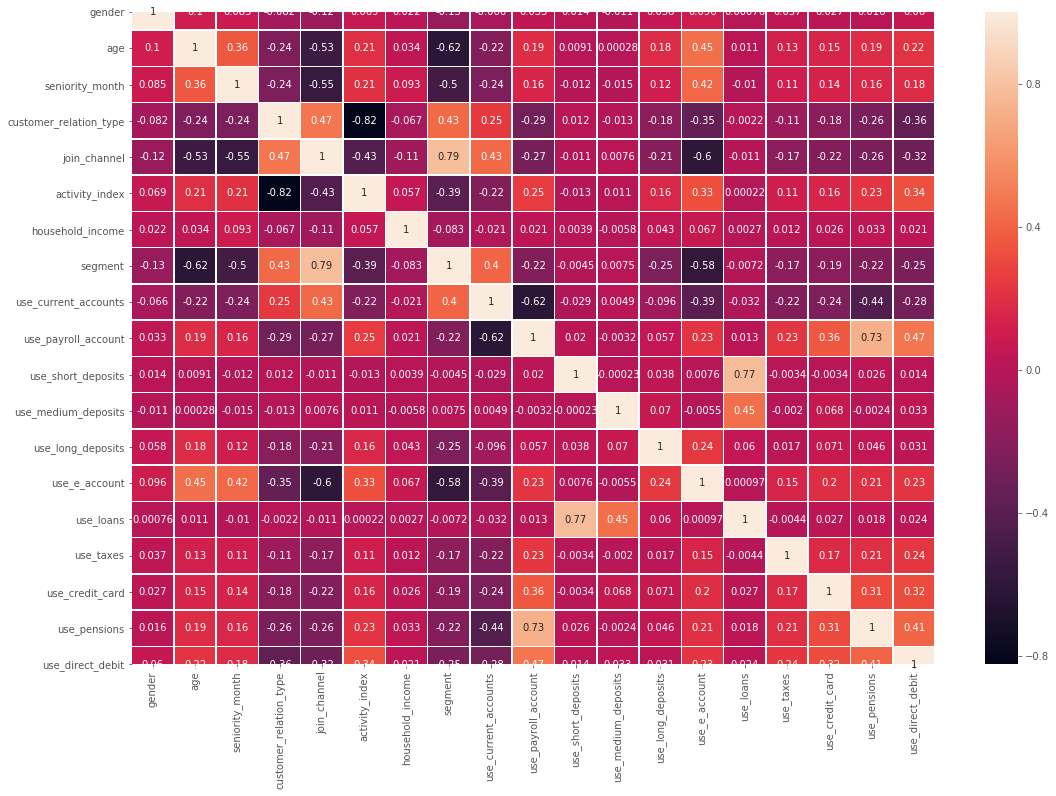

In [13]:
sns.heatmap(df_preproc.corr('kendall'), annot=True, linewidths=.5);

In [16]:
for col in df_preproc.columns: print(col, df_preproc[col].unique())

gender [2 0 1]
age [47 52 24 26 23 28 25 29 34 59 44 40 27 56 33 42 41 38 51 30 37 31 36 45
 43 46 86 53 62 39 -1 57 35 48 55 73 32  5 67 78 63 22 14 11 16 54 68 50
 72 70 64 20 61 75 60 49 58 85 83 74 66 89 80 10 65 88 76 91 69  6 15 92
 81 12 79  7 13 77 17  9 82 18 21 71 90 19 94  8 87 98]
seniority_month [36 -1  5 31  8  9 40 22 35 17 11 23 27 34 14 19 38  7 37 20 21 12 13 10
 39 18 26 32 28  6 33 30 24 16 15  0]
customer_relation_type [0 1 2]
join_channel [ 6 10  5  2  1 13  8 11  9  0 14  3 12  4]
activity_index [ 1.  0. -1.]
household_income [ 47164.86  68262.93  47451.24 ... 116417.85 180583.11  49240.68]
segment [1 0 2 3]
use_current_accounts [0 1]
use_payroll_account [1 0]
use_short_deposits [0 1]
use_medium_deposits [0 1]
use_long_deposits [0 1]
use_e_account [0 1]
use_loans [0 1]
use_taxes [0 1]
use_credit_card [0 1]
use_pensions [ 1.  0. -1.]
use_direct_debit [0 1]


In [17]:
#df_preproc.info()

In [18]:
X = df_preproc.drop('use_direct_debit', axis=1)
y = df_preproc['use_direct_debit']

In [19]:
#for col in df_preproc.columns: print(col, df_preproc[col].isna().any())

In [20]:
# Поделите данные X и y на 2 части (train и test, размером от исходного 70% и 30% соответственно)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

tree = DecisionTreeClassifier(random_state=0, 
                              max_depth=6, 
                              min_samples_leaf=7,
                              min_samples_split=150,
                              max_leaf_nodes=18,
                              class_weight={1: 0.0003, 0:0.00018})


cv = KFold(10, shuffle=True, random_state=0)
result = cv.split(X)

my_list = []
for train_index, test_index in result:
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    tree.fit(X_train, y_train) # обучаем модель (дерево принятия решений)
    pred = tree.predict(X_test) # вмыдаем ответ
    print(f1_score(y_test, pred))
    my_list.append(f1_score(y_test, pred))
print('--')
print(sum(my_list)/len(my_list))

0.5087719298245615
0.5384615384615384
0.6176470588235293
0.5037037037037037
0.49253731343283574
0.4657534246575342
0.5714285714285714
0.6258503401360545
0.47863247863247854
0.5389221556886228
--
0.5341708514789429


In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X, y, cv=cv, scoring='f1')
scores 
print(sum(scores)/len(scores))

0.5329980807837305


In [26]:
def demo_feature_importance():
    scores = tree.feature_importances_ 
    for score, name in zip(scores, X.columns):
        print(" {:.4f} : {}".format(score, name))
        
demo_feature_importance()

 0.0000 : gender
 0.0973 : age
 0.0043 : seniority_month
 0.2019 : customer_relation_type
 0.0093 : join_channel
 0.0097 : activity_index
 0.0000 : household_income
 0.0029 : segment
 0.0313 : use_current_accounts
 0.6011 : use_payroll_account
 0.0000 : use_short_deposits
 0.0000 : use_medium_deposits
 0.0000 : use_long_deposits
 0.0037 : use_e_account
 0.0000 : use_loans
 0.0135 : use_taxes
 0.0250 : use_credit_card
 0.0000 : use_pensions


In [28]:
df_preproc2 = df_test.pipe(preprocess_data)

In [29]:
pred = tree.predict(df_preproc2)

In [30]:
pd.DataFrame(zip(
    df_test['customer_id'],
    pred), columns=['customer_id', 'use_direct_debit']).to_csv('pred.csv', sep=',', index=False)

In [31]:
df_preproc2.shape

(7500, 18)

In [32]:
df_test.shape

(7500, 28)

In [33]:
np.unique(pred, return_counts=True)

(array([0, 1]), array([6981,  519]))

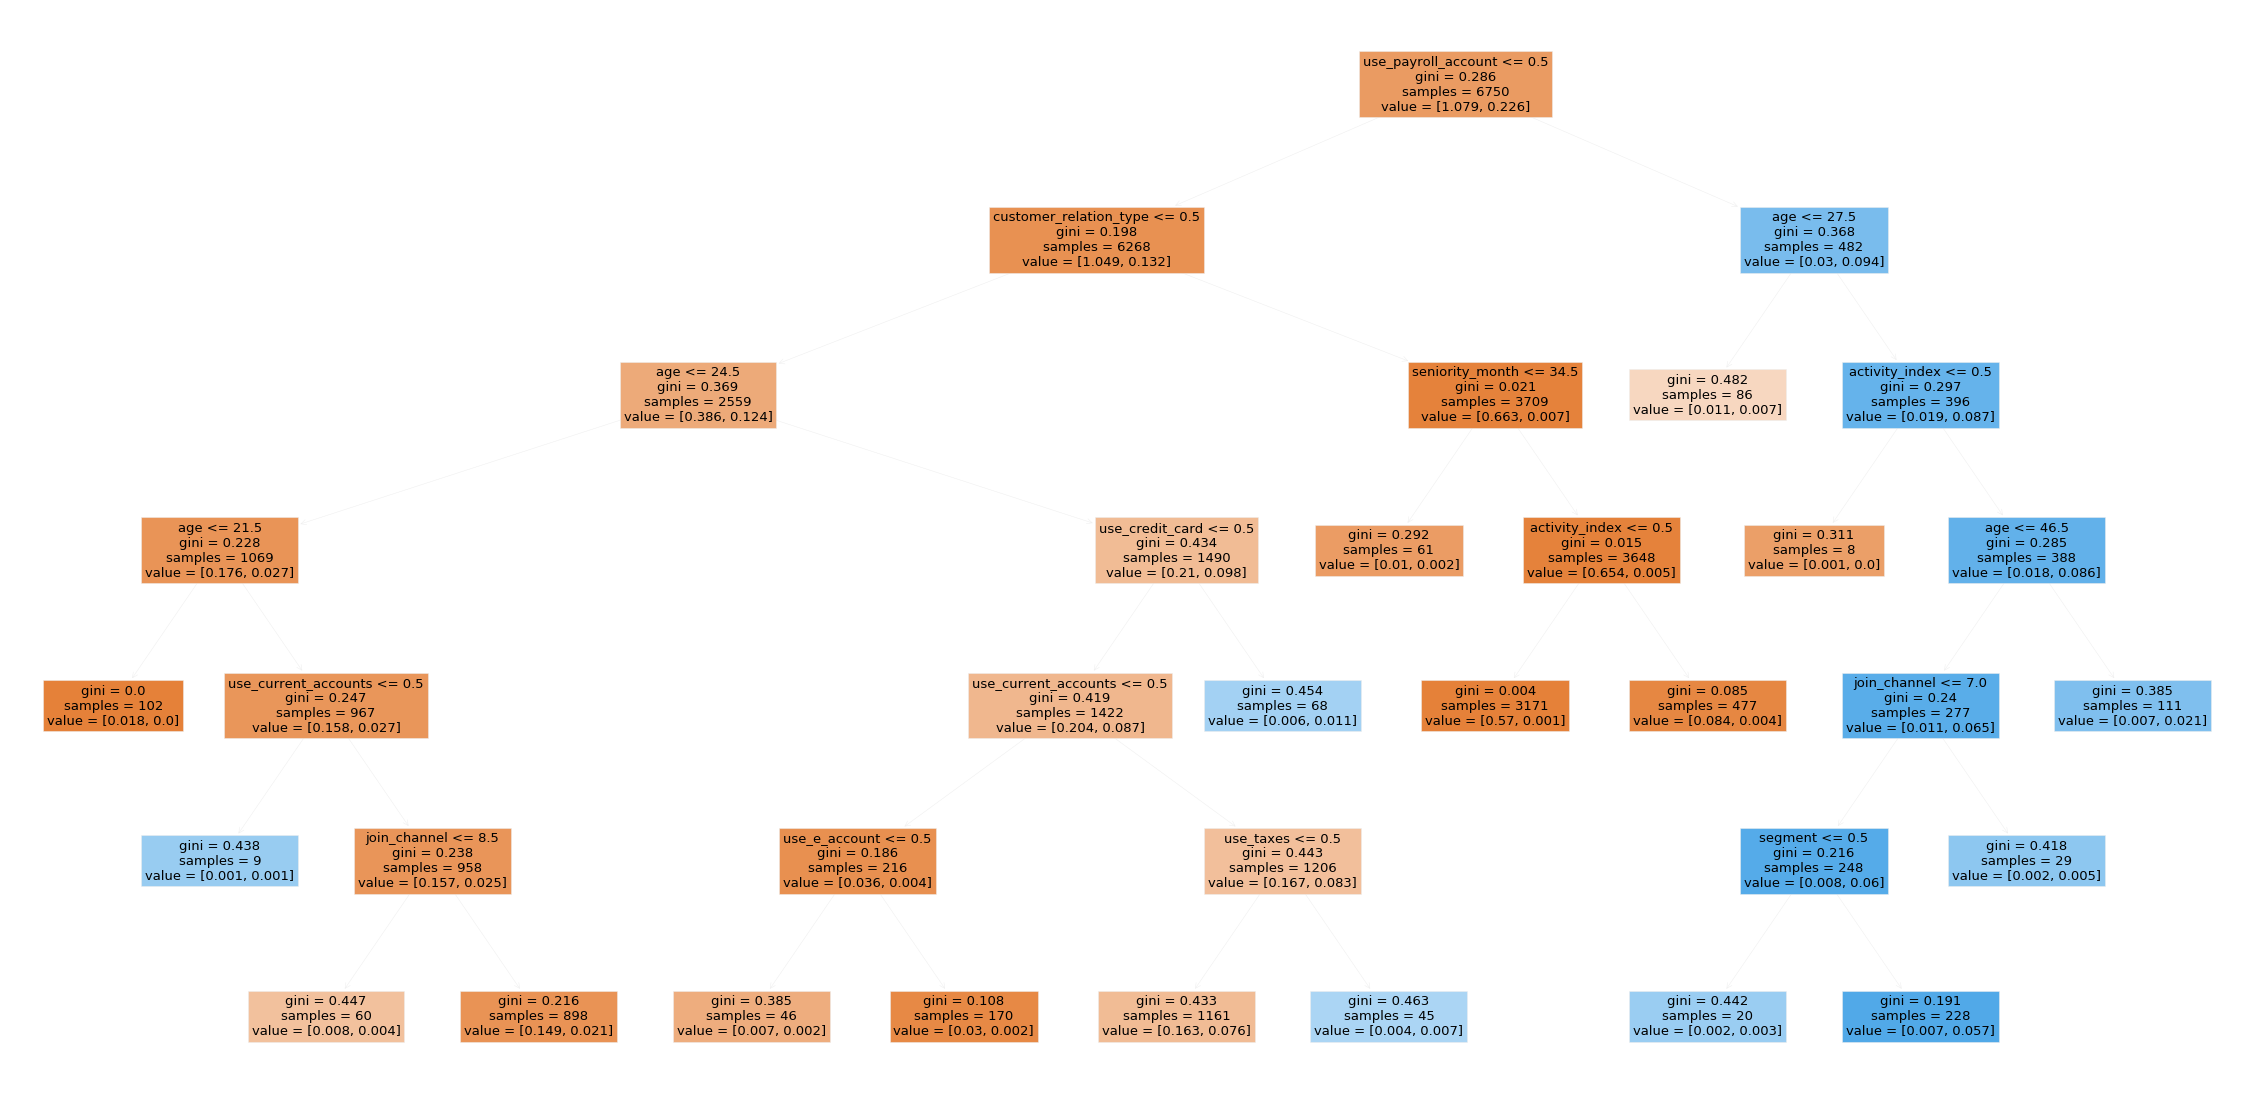

In [34]:
fig, ax = plt.subplots(figsize=(40,20))
     
# draw tree
plot_tree(tree, feature_names=df_preproc.columns, filled=True, ax=ax)
  
plt.show()